In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
breasts = pd.read_csv('data.csv')
breast_features = ['diagnosis',
    'radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
    'compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean',
    'radius_se','texture_se','perimeter_se','area_se','smoothness_se',
    'compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se',
    'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst',
    'compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'
]

X = breasts[breast_features].drop(columns=['diagnosis'])
y = breasts['diagnosis']

knn= KNeighborsClassifier(n_neighbors=24)


NameError: name 'pd' is not defined

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state = 69)


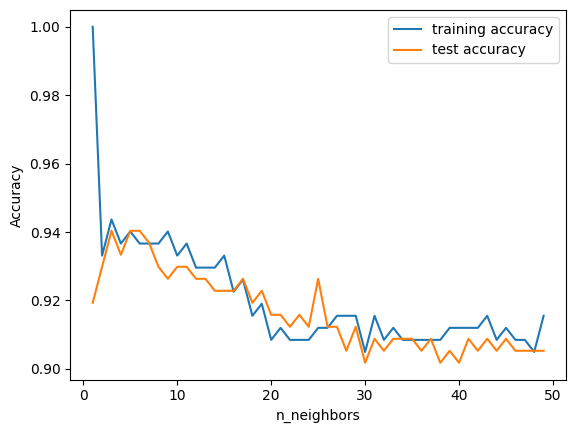

In [75]:
training_acc = []
test_acc = []
neighbors_settings = range(1, 50)


for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))



plt.plot(neighbors_settings, training_acc, label="training accuracy")
plt.plot(neighbors_settings, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [79]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print("train accuracy = ", knn.score(X_train, y_train))
print("test accuracy = ", knn.score(X_test,y_test))


train accuracy =  0.9401408450704225
test accuracy =  0.9263157894736842


In [71]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1, 50, 1):
    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 50) # try n_neighbors from 1 to 50

    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state = seedN)
        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy

    lahat_training[seedN] = training_accuracy
    lahat_test[seedN] = test_accuracy

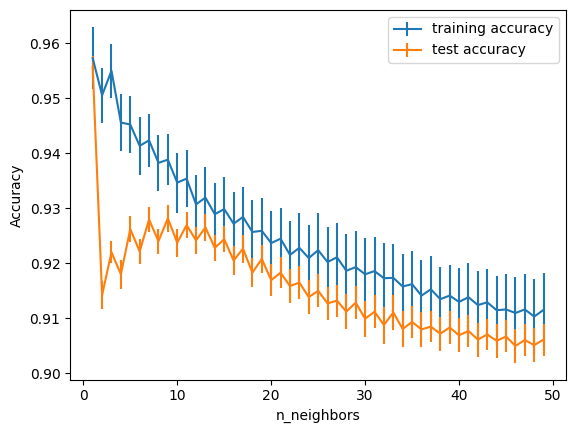

In [72]:
plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()